#### taken from https://github.com/rlcode/reinforcement-learning-kr-v2/blob/master/1-grid-world/5-deep-sarsa/train.py

In [1]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt
import copy
import pylab
import random

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

In [3]:
class DeepSARSA(tf.keras.Model):
    def __init__(self, action_size):
        super(DeepSARSA, self).__init__()
        self.fc1 = Dense(30, activation='relu')
        self.fc2 = Dense(30, activation='relu')
        self.fc_out = Dense(action_size)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        q = self.fc_out(x)
        return q


class DeepSARSAgent:
    def __init__(self, state_size, action_size):
        # Define state size and action size
        self.state_size = state_size
        self.action_size = action_size
        
        # Deep SARSA Hyper parameter
        self.discount_factor = 0.99
        self.learning_rate = 0.001
        self.epsilon = 1.  
        self.epsilon_decay = .9999
        self.epsilon_min = 0.01
        self.model = DeepSARSA(self.action_size)
        self.optimizer = Adam(lr=self.learning_rate)

    # e-greedy action policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_values = self.model(state)
            return np.argmax(q_values[0])

    # Model update from samples of <s, a, r, s', a'>
    def train_model(self, state, action, reward, next_state, next_action, done):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

        model_params = self.model.trainable_variables
        with tf.GradientTape() as tape:
            tape.watch(model_params)
            predict = self.model(state)[0]
            one_hot_action = tf.one_hot([action], self.action_size)
            predict = tf.reduce_sum(one_hot_action * predict, axis=1)

            # If done = True, the episode is over and there is no next state
            next_q = self.model(next_state)[0][next_action]
            target = reward + (1 - done) * self.discount_factor * next_q

            # MSE loss function
            loss = tf.reduce_mean(tf.square(target - predict))
        
        # Model update to reduce loss function
        grads = tape.gradient(loss, model_params)
        self.optimizer.apply_gradients(zip(grads, model_params))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

episode:   0 | score: -200.000000 | epsilon: 0.980
episode:   1 | score: -200.000000 | epsilon: 0.961
episode:   2 | score: -200.000000 | epsilon: 0.942
episode:   3 | score: -200.000000 | epsilon: 0.923
episode:   4 | score: -200.000000 | epsilon: 0.905
episode:   5 | score: -200.000000 | epsilon: 0.887
episode:   6 | score: -200.000000 | epsilon: 0.869
episode:   7 | score: -200.000000 | epsilon: 0.852
episode:   8 | score: -200.000000 | epsilon: 0.835
episode:   9 | score: -200.000000 | epsilon: 0.81

episode: 147 | score: -200.000000 | epsilon: 0.052
episode: 148 | score: -200.000000 | epsilon: 0.051
episode: 149 | score: -200.000000 | epsilon: 0.050
episode: 150 | score: -200.000000 | epsilon: 0.049
episode: 151 | score: -200.000000 | epsilon: 0.048
episode: 152 | score: -200.000000 | epsilon: 0.047
episode: 153 | score: -200.000000 | epsilon: 0.046
episode: 154 | score: -200.000000 | epsilon: 0.045
episode: 155 | score: -200.000000 | epsilon: 0.044
episode: 156 | score: -200.000000 | epsilon: 0.044
episode: 157 | score: -200.000000 | epsilon: 0.043
episode: 158 | score: -200.000000 | epsilon: 0.042
episode: 159 | score: -200.000000 | epsilon: 0.041
episode: 160 | score: -200.000000 | epsilon: 0.040
episode: 161 | score: -200.000000 | epsilon: 0.039
episode: 162 | score: -200.000000 | epsilon: 0.039
episode: 163 | score: -200.000000 | epsilon: 0.038
episode: 164 | score: -200.000000 | epsilon: 0.037
episode: 165 | score: -200.000000 | epsilon: 0.036
episode: 166 | score: -200.0000

episode: 308 | score: -200.000000 | epsilon: 0.010
episode: 309 | score: -200.000000 | epsilon: 0.010
episode: 310 | score: -200.000000 | epsilon: 0.010
episode: 311 | score: -200.000000 | epsilon: 0.010
episode: 312 | score: -200.000000 | epsilon: 0.010
episode: 313 | score: -200.000000 | epsilon: 0.010
episode: 314 | score: -200.000000 | epsilon: 0.010
episode: 315 | score: -200.000000 | epsilon: 0.010
episode: 316 | score: -200.000000 | epsilon: 0.010
episode: 317 | score: -200.000000 | epsilon: 0.010
episode: 318 | score: -200.000000 | epsilon: 0.010
episode: 319 | score: -200.000000 | epsilon: 0.010
episode: 320 | score: -200.000000 | epsilon: 0.010
episode: 321 | score: -200.000000 | epsilon: 0.010
episode: 322 | score: -200.000000 | epsilon: 0.010
episode: 323 | score: -200.000000 | epsilon: 0.010
episode: 324 | score: -200.000000 | epsilon: 0.010
episode: 325 | score: -200.000000 | epsilon: 0.010
episode: 326 | score: -200.000000 | epsilon: 0.010
episode: 327 | score: -200.0000

episode: 469 | score: -200.000000 | epsilon: 0.010
episode: 470 | score: -200.000000 | epsilon: 0.010
episode: 471 | score: -200.000000 | epsilon: 0.010
episode: 472 | score: -200.000000 | epsilon: 0.010
episode: 473 | score: -200.000000 | epsilon: 0.010
episode: 474 | score: -200.000000 | epsilon: 0.010
episode: 475 | score: -200.000000 | epsilon: 0.010
episode: 476 | score: -200.000000 | epsilon: 0.010
episode: 477 | score: -200.000000 | epsilon: 0.010
episode: 478 | score: -200.000000 | epsilon: 0.010
episode: 479 | score: -200.000000 | epsilon: 0.010
episode: 480 | score: -200.000000 | epsilon: 0.010
episode: 481 | score: -200.000000 | epsilon: 0.010
episode: 482 | score: -200.000000 | epsilon: 0.010
episode: 483 | score: -200.000000 | epsilon: 0.010
episode: 484 | score: -200.000000 | epsilon: 0.010
episode: 485 | score: -200.000000 | epsilon: 0.010
episode: 486 | score: -200.000000 | epsilon: 0.010
episode: 487 | score: -200.000000 | epsilon: 0.010
episode: 488 | score: -200.0000

episode: 630 | score: -200.000000 | epsilon: 0.010
episode: 631 | score: -200.000000 | epsilon: 0.010
episode: 632 | score: -200.000000 | epsilon: 0.010
episode: 633 | score: -200.000000 | epsilon: 0.010
episode: 634 | score: -200.000000 | epsilon: 0.010
episode: 635 | score: -200.000000 | epsilon: 0.010
episode: 636 | score: -200.000000 | epsilon: 0.010
episode: 637 | score: -200.000000 | epsilon: 0.010
episode: 638 | score: -200.000000 | epsilon: 0.010
episode: 639 | score: -200.000000 | epsilon: 0.010
episode: 640 | score: -200.000000 | epsilon: 0.010
episode: 641 | score: -200.000000 | epsilon: 0.010
episode: 642 | score: -200.000000 | epsilon: 0.010
episode: 643 | score: -200.000000 | epsilon: 0.010
episode: 644 | score: -200.000000 | epsilon: 0.010
episode: 645 | score: -200.000000 | epsilon: 0.010
episode: 646 | score: -200.000000 | epsilon: 0.010
episode: 647 | score: -200.000000 | epsilon: 0.010
episode: 648 | score: -200.000000 | epsilon: 0.010
episode: 649 | score: -200.0000

episode: 791 | score: -200.000000 | epsilon: 0.010
episode: 792 | score: -200.000000 | epsilon: 0.010
episode: 793 | score: -200.000000 | epsilon: 0.010
episode: 794 | score: -200.000000 | epsilon: 0.010
episode: 795 | score: -200.000000 | epsilon: 0.010
episode: 796 | score: -200.000000 | epsilon: 0.010
episode: 797 | score: -200.000000 | epsilon: 0.010
episode: 798 | score: -200.000000 | epsilon: 0.010
episode: 799 | score: -200.000000 | epsilon: 0.010
episode: 800 | score: -200.000000 | epsilon: 0.010
episode: 801 | score: -200.000000 | epsilon: 0.010
episode: 802 | score: -200.000000 | epsilon: 0.010
episode: 803 | score: -161.000000 | epsilon: 0.010
episode: 804 | score: -200.000000 | epsilon: 0.010
episode: 805 | score: -200.000000 | epsilon: 0.010
episode: 806 | score: -200.000000 | epsilon: 0.010
episode: 807 | score: -200.000000 | epsilon: 0.010
episode: 808 | score: -200.000000 | epsilon: 0.010
episode: 809 | score: -200.000000 | epsilon: 0.010
episode: 810 | score: -200.0000

episode: 952 | score: -200.000000 | epsilon: 0.010
episode: 953 | score: -200.000000 | epsilon: 0.010
episode: 954 | score: -200.000000 | epsilon: 0.010
episode: 955 | score: -200.000000 | epsilon: 0.010
episode: 956 | score: -200.000000 | epsilon: 0.010
episode: 957 | score: -200.000000 | epsilon: 0.010
episode: 958 | score: -200.000000 | epsilon: 0.010
episode: 959 | score: -200.000000 | epsilon: 0.010
episode: 960 | score: -200.000000 | epsilon: 0.010
episode: 961 | score: -200.000000 | epsilon: 0.010
episode: 962 | score: -200.000000 | epsilon: 0.010
episode: 963 | score: -200.000000 | epsilon: 0.010
episode: 964 | score: -200.000000 | epsilon: 0.010
episode: 965 | score: -200.000000 | epsilon: 0.010
episode: 966 | score: -200.000000 | epsilon: 0.010
episode: 967 | score: -200.000000 | epsilon: 0.010
episode: 968 | score: -200.000000 | epsilon: 0.010
episode: 969 | score: -200.000000 | epsilon: 0.010
episode: 970 | score: -200.000000 | epsilon: 0.010
episode: 971 | score: -200.0000

episode: 1111 | score: -198.000000 | epsilon: 0.010
episode: 1112 | score: -200.000000 | epsilon: 0.010
episode: 1113 | score: -200.000000 | epsilon: 0.010
episode: 1114 | score: -200.000000 | epsilon: 0.010
episode: 1115 | score: -200.000000 | epsilon: 0.010
episode: 1116 | score: -200.000000 | epsilon: 0.010
episode: 1117 | score: -200.000000 | epsilon: 0.010
episode: 1118 | score: -200.000000 | epsilon: 0.010
episode: 1119 | score: -200.000000 | epsilon: 0.010
episode: 1120 | score: -200.000000 | epsilon: 0.010
episode: 1121 | score: -200.000000 | epsilon: 0.010
episode: 1122 | score: -200.000000 | epsilon: 0.010
episode: 1123 | score: -200.000000 | epsilon: 0.010
episode: 1124 | score: -200.000000 | epsilon: 0.010
episode: 1125 | score: -200.000000 | epsilon: 0.010
episode: 1126 | score: -200.000000 | epsilon: 0.010
episode: 1127 | score: -200.000000 | epsilon: 0.010
episode: 1128 | score: -200.000000 | epsilon: 0.010
episode: 1129 | score: -200.000000 | epsilon: 0.010
episode: 113

episode: 1269 | score: -200.000000 | epsilon: 0.010
episode: 1270 | score: -200.000000 | epsilon: 0.010
episode: 1271 | score: -200.000000 | epsilon: 0.010
episode: 1272 | score: -200.000000 | epsilon: 0.010
episode: 1273 | score: -200.000000 | epsilon: 0.010
episode: 1274 | score: -200.000000 | epsilon: 0.010
episode: 1275 | score: -200.000000 | epsilon: 0.010
episode: 1276 | score: -200.000000 | epsilon: 0.010
episode: 1277 | score: -200.000000 | epsilon: 0.010
episode: 1278 | score: -168.000000 | epsilon: 0.010
episode: 1279 | score: -200.000000 | epsilon: 0.010
episode: 1280 | score: -200.000000 | epsilon: 0.010
episode: 1281 | score: -200.000000 | epsilon: 0.010
episode: 1282 | score: -200.000000 | epsilon: 0.010
episode: 1283 | score: -200.000000 | epsilon: 0.010
episode: 1284 | score: -200.000000 | epsilon: 0.010
episode: 1285 | score: -200.000000 | epsilon: 0.010
episode: 1286 | score: -200.000000 | epsilon: 0.010
episode: 1287 | score: -200.000000 | epsilon: 0.010
episode: 128

episode: 1427 | score: -200.000000 | epsilon: 0.010
episode: 1428 | score: -94.000000 | epsilon: 0.010
episode: 1429 | score: -200.000000 | epsilon: 0.010
episode: 1430 | score: -200.000000 | epsilon: 0.010
episode: 1431 | score: -200.000000 | epsilon: 0.010
episode: 1432 | score: -200.000000 | epsilon: 0.010
episode: 1433 | score: -200.000000 | epsilon: 0.010
episode: 1434 | score: -200.000000 | epsilon: 0.010
episode: 1435 | score: -200.000000 | epsilon: 0.010
episode: 1436 | score: -200.000000 | epsilon: 0.010
episode: 1437 | score: -200.000000 | epsilon: 0.010
episode: 1438 | score: -200.000000 | epsilon: 0.010
episode: 1439 | score: -200.000000 | epsilon: 0.010
episode: 1440 | score: -200.000000 | epsilon: 0.010
episode: 1441 | score: -200.000000 | epsilon: 0.010
episode: 1442 | score: -200.000000 | epsilon: 0.010
episode: 1443 | score: -200.000000 | epsilon: 0.010
episode: 1444 | score: -200.000000 | epsilon: 0.010
episode: 1445 | score: -200.000000 | epsilon: 0.010
episode: 1446

episode: 1585 | score: -200.000000 | epsilon: 0.010
episode: 1586 | score: -200.000000 | epsilon: 0.010
episode: 1587 | score: -200.000000 | epsilon: 0.010
episode: 1588 | score: -200.000000 | epsilon: 0.010
episode: 1589 | score: -200.000000 | epsilon: 0.010
episode: 1590 | score: -200.000000 | epsilon: 0.010
episode: 1591 | score: -200.000000 | epsilon: 0.010
episode: 1592 | score: -200.000000 | epsilon: 0.010
episode: 1593 | score: -200.000000 | epsilon: 0.010
episode: 1594 | score: -200.000000 | epsilon: 0.010
episode: 1595 | score: -200.000000 | epsilon: 0.010
episode: 1596 | score: -200.000000 | epsilon: 0.010
episode: 1597 | score: -200.000000 | epsilon: 0.010
episode: 1598 | score: -200.000000 | epsilon: 0.010
episode: 1599 | score: -200.000000 | epsilon: 0.010
episode: 1600 | score: -200.000000 | epsilon: 0.010
episode: 1601 | score: -200.000000 | epsilon: 0.010
episode: 1602 | score: -200.000000 | epsilon: 0.010
episode: 1603 | score: -200.000000 | epsilon: 0.010
episode: 160

episode: 1743 | score: -200.000000 | epsilon: 0.010
episode: 1744 | score: -200.000000 | epsilon: 0.010
episode: 1745 | score: -200.000000 | epsilon: 0.010
episode: 1746 | score: -200.000000 | epsilon: 0.010
episode: 1747 | score: -200.000000 | epsilon: 0.010
episode: 1748 | score: -200.000000 | epsilon: 0.010
episode: 1749 | score: -200.000000 | epsilon: 0.010
episode: 1750 | score: -200.000000 | epsilon: 0.010
episode: 1751 | score: -200.000000 | epsilon: 0.010
episode: 1752 | score: -200.000000 | epsilon: 0.010
episode: 1753 | score: -200.000000 | epsilon: 0.010
episode: 1754 | score: -200.000000 | epsilon: 0.010
episode: 1755 | score: -200.000000 | epsilon: 0.010
episode: 1756 | score: -200.000000 | epsilon: 0.010
episode: 1757 | score: -200.000000 | epsilon: 0.010
episode: 1758 | score: -200.000000 | epsilon: 0.010
episode: 1759 | score: -200.000000 | epsilon: 0.010
episode: 1760 | score: -200.000000 | epsilon: 0.010
episode: 1761 | score: -200.000000 | epsilon: 0.010
episode: 176

episode: 1901 | score: -200.000000 | epsilon: 0.010
episode: 1902 | score: -200.000000 | epsilon: 0.010
episode: 1903 | score: -200.000000 | epsilon: 0.010
episode: 1904 | score: -200.000000 | epsilon: 0.010
episode: 1905 | score: -200.000000 | epsilon: 0.010
episode: 1906 | score: -200.000000 | epsilon: 0.010
episode: 1907 | score: -200.000000 | epsilon: 0.010
episode: 1908 | score: -200.000000 | epsilon: 0.010
episode: 1909 | score: -200.000000 | epsilon: 0.010
episode: 1910 | score: -200.000000 | epsilon: 0.010
episode: 1911 | score: -200.000000 | epsilon: 0.010
episode: 1912 | score: -200.000000 | epsilon: 0.010
episode: 1913 | score: -200.000000 | epsilon: 0.010
episode: 1914 | score: -200.000000 | epsilon: 0.010
episode: 1915 | score: -200.000000 | epsilon: 0.010
episode: 1916 | score: -200.000000 | epsilon: 0.010
episode: 1917 | score: -200.000000 | epsilon: 0.010
episode: 1918 | score: -200.000000 | epsilon: 0.010
episode: 1919 | score: -200.000000 | epsilon: 0.010
episode: 192

episode: 2059 | score: -194.000000 | epsilon: 0.010
episode: 2060 | score: -200.000000 | epsilon: 0.010
episode: 2061 | score: -200.000000 | epsilon: 0.010
episode: 2062 | score: -200.000000 | epsilon: 0.010
episode: 2063 | score: -200.000000 | epsilon: 0.010
episode: 2064 | score: -200.000000 | epsilon: 0.010
episode: 2065 | score: -200.000000 | epsilon: 0.010
episode: 2066 | score: -200.000000 | epsilon: 0.010
episode: 2067 | score: -200.000000 | epsilon: 0.010
episode: 2068 | score: -200.000000 | epsilon: 0.010
episode: 2069 | score: -200.000000 | epsilon: 0.010
episode: 2070 | score: -200.000000 | epsilon: 0.010
episode: 2071 | score: -200.000000 | epsilon: 0.010
episode: 2072 | score: -200.000000 | epsilon: 0.010
episode: 2073 | score: -200.000000 | epsilon: 0.010
episode: 2074 | score: -200.000000 | epsilon: 0.010
episode: 2075 | score: -200.000000 | epsilon: 0.010
episode: 2076 | score: -200.000000 | epsilon: 0.010
episode: 2077 | score: -200.000000 | epsilon: 0.010
episode: 207

episode: 2217 | score: -200.000000 | epsilon: 0.010
episode: 2218 | score: -200.000000 | epsilon: 0.010
episode: 2219 | score: -200.000000 | epsilon: 0.010
episode: 2220 | score: -200.000000 | epsilon: 0.010
episode: 2221 | score: -200.000000 | epsilon: 0.010
episode: 2222 | score: -200.000000 | epsilon: 0.010
episode: 2223 | score: -200.000000 | epsilon: 0.010
episode: 2224 | score: -200.000000 | epsilon: 0.010
episode: 2225 | score: -200.000000 | epsilon: 0.010
episode: 2226 | score: -200.000000 | epsilon: 0.010
episode: 2227 | score: -200.000000 | epsilon: 0.010
episode: 2228 | score: -200.000000 | epsilon: 0.010
episode: 2229 | score: -200.000000 | epsilon: 0.010
episode: 2230 | score: -200.000000 | epsilon: 0.010
episode: 2231 | score: -200.000000 | epsilon: 0.010
episode: 2232 | score: -200.000000 | epsilon: 0.010
episode: 2233 | score: -200.000000 | epsilon: 0.010
episode: 2234 | score: -200.000000 | epsilon: 0.010
episode: 2235 | score: -200.000000 | epsilon: 0.010
episode: 223

episode: 2375 | score: -200.000000 | epsilon: 0.010
episode: 2376 | score: -200.000000 | epsilon: 0.010
episode: 2377 | score: -200.000000 | epsilon: 0.010
episode: 2378 | score: -200.000000 | epsilon: 0.010
episode: 2379 | score: -200.000000 | epsilon: 0.010
episode: 2380 | score: -200.000000 | epsilon: 0.010
episode: 2381 | score: -200.000000 | epsilon: 0.010
episode: 2382 | score: -200.000000 | epsilon: 0.010
episode: 2383 | score: -200.000000 | epsilon: 0.010
episode: 2384 | score: -200.000000 | epsilon: 0.010
episode: 2385 | score: -200.000000 | epsilon: 0.010
episode: 2386 | score: -200.000000 | epsilon: 0.010
episode: 2387 | score: -200.000000 | epsilon: 0.010
episode: 2388 | score: -200.000000 | epsilon: 0.010
episode: 2389 | score: -200.000000 | epsilon: 0.010
episode: 2390 | score: -200.000000 | epsilon: 0.010
episode: 2391 | score: -200.000000 | epsilon: 0.010
episode: 2392 | score: -200.000000 | epsilon: 0.010
episode: 2393 | score: -200.000000 | epsilon: 0.010
episode: 239

episode: 2533 | score: -200.000000 | epsilon: 0.010
episode: 2534 | score: -200.000000 | epsilon: 0.010
episode: 2535 | score: -200.000000 | epsilon: 0.010
episode: 2536 | score: -200.000000 | epsilon: 0.010
episode: 2537 | score: -200.000000 | epsilon: 0.010
episode: 2538 | score: -200.000000 | epsilon: 0.010
episode: 2539 | score: -200.000000 | epsilon: 0.010
episode: 2540 | score: -200.000000 | epsilon: 0.010
episode: 2541 | score: -200.000000 | epsilon: 0.010
episode: 2542 | score: -200.000000 | epsilon: 0.010
episode: 2543 | score: -200.000000 | epsilon: 0.010
episode: 2544 | score: -200.000000 | epsilon: 0.010
episode: 2545 | score: -200.000000 | epsilon: 0.010
episode: 2546 | score: -200.000000 | epsilon: 0.010
episode: 2547 | score: -200.000000 | epsilon: 0.010
episode: 2548 | score: -200.000000 | epsilon: 0.010
episode: 2549 | score: -200.000000 | epsilon: 0.010
episode: 2550 | score: -200.000000 | epsilon: 0.010
episode: 2551 | score: -200.000000 | epsilon: 0.010
episode: 255

episode: 2691 | score: -200.000000 | epsilon: 0.010
episode: 2692 | score: -200.000000 | epsilon: 0.010
episode: 2693 | score: -200.000000 | epsilon: 0.010
episode: 2694 | score: -200.000000 | epsilon: 0.010
episode: 2695 | score: -200.000000 | epsilon: 0.010
episode: 2696 | score: -200.000000 | epsilon: 0.010
episode: 2697 | score: -200.000000 | epsilon: 0.010
episode: 2698 | score: -200.000000 | epsilon: 0.010
episode: 2699 | score: -200.000000 | epsilon: 0.010
episode: 2700 | score: -200.000000 | epsilon: 0.010
episode: 2701 | score: -200.000000 | epsilon: 0.010
episode: 2702 | score: -200.000000 | epsilon: 0.010
episode: 2703 | score: -200.000000 | epsilon: 0.010
episode: 2704 | score: -200.000000 | epsilon: 0.010
episode: 2705 | score: -200.000000 | epsilon: 0.010
episode: 2706 | score: -200.000000 | epsilon: 0.010
episode: 2707 | score: -200.000000 | epsilon: 0.010
episode: 2708 | score: -200.000000 | epsilon: 0.010
episode: 2709 | score: -200.000000 | epsilon: 0.010
episode: 271

episode: 2849 | score: -200.000000 | epsilon: 0.010
episode: 2850 | score: -200.000000 | epsilon: 0.010
episode: 2851 | score: -200.000000 | epsilon: 0.010
episode: 2852 | score: -200.000000 | epsilon: 0.010
episode: 2853 | score: -200.000000 | epsilon: 0.010
episode: 2854 | score: -200.000000 | epsilon: 0.010
episode: 2855 | score: -200.000000 | epsilon: 0.010
episode: 2856 | score: -200.000000 | epsilon: 0.010
episode: 2857 | score: -200.000000 | epsilon: 0.010
episode: 2858 | score: -200.000000 | epsilon: 0.010
episode: 2859 | score: -200.000000 | epsilon: 0.010
episode: 2860 | score: -200.000000 | epsilon: 0.010
episode: 2861 | score: -200.000000 | epsilon: 0.010
episode: 2862 | score: -200.000000 | epsilon: 0.010
episode: 2863 | score: -200.000000 | epsilon: 0.010
episode: 2864 | score: -200.000000 | epsilon: 0.010
episode: 2865 | score: -200.000000 | epsilon: 0.010
episode: 2866 | score: -200.000000 | epsilon: 0.010
episode: 2867 | score: -200.000000 | epsilon: 0.010
episode: 286

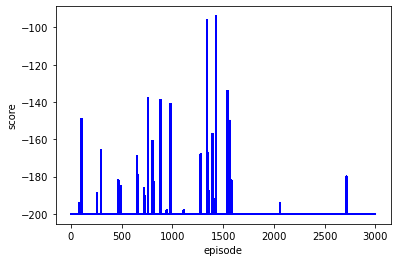

In [4]:
# 환경과 에이전트 생성
env = gym.make('MountainCar-v0')
# buckets=[20, 20]
state_size = env.observation_space.shape[0]
# print(state_size)
action_size = env.action_space.n
agent = DeepSARSAgent(state_size, action_size)

scores, episodes = [], []
max_score = -201

EPISODES = 3000
for e in range(EPISODES):
    
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        # Choose action
        action = agent.get_action(state)

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        next_action = agent.get_action(next_state)

        # train model
        agent.train_model(state, action, reward, next_state, 
                            next_action, done)
        score += reward
        state = next_state

        if done:
            # print result every episode
            print("episode: {:3d} | score: {:3f} | epsilon: {:.3f}".format(
                  e, score, agent.epsilon))

            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            pylab.xlabel("episode")
            pylab.ylabel("score")
            pylab.savefig("./save_graph/graph.png")
            if score > max_score:
                max_score = score

    # save model every 100 episode
    if e % 100 == 0:
        agent.model.save_weights('save_model/model', save_format='tf')

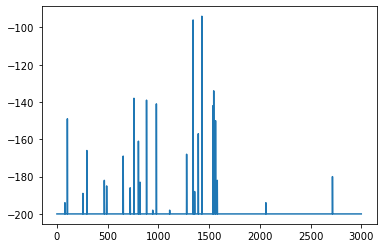

In [5]:
plt.plot(scores)
plt.show()

In [6]:
max_score

-94.0

In [7]:
np.mean(scores)

-199.68766666666667